# Deep-Learning Lab Session

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import BatchNormalization
from keras.regularizers import l2
import matplotlib.pyplot as plt

## Loading MNIST Data from Keras

MNIST is a database. The acronym stands for “Modified National Institute of Standards and Technology.” The MNIST 

database contains handwritten digits (0 through 9), and can provide a baseline for testing image processing systems. 


11501568/11490434 [==============================] - 0s 0us/step


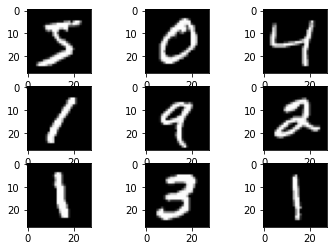

In [ ]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## Normalizing

In [ ]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

In [ ]:
print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
print(x_train.shape[0])

60000


In [ ]:
print((x_train.shape[1:]))

(28, 28)


In [ ]:
print(np.prod(x_train.shape[1:]))

784


In [ ]:
x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
x_test = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]))

print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
print(y_train)
print(y_train.shape)

[5 0 4 ... 5 6 8]
(60000,)


## One hot encoding the Target variable

In [ ]:
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

In [ ]:
print(y_train)
print(y_train.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(60000, 10)



### Layers, Data and Learning Representations

<br />

* __Layers__: logically grouped operations in a neural network, the parameters for the operations in the layer learn to generate the best features to predict the target
 
<img src='img/nn_layers.jpeg' width='400px'/>

<img src='img/nn_layer_operations.png' width='650px'/>

<br />

* The network needs to have __input data__ and corresponding __targets (y)__

<br />

* In traditional machine learning we see that changing the representation of the data (kernel trick, etc.) helps ease the process of learning from data

<br />

* __Activation function__ adds that non linearity and in combination with weights (parameters) of a layer, the network learns better representations of the data at each layer

<br />

### So basically, each layer takes input as data and spits out transformed data as output, simple as that. Now, let's dive into the details

<img src='img/learning_representations_mlp.jpg' />

<br />

* The goal of training neural networks is to find these perfect representation of data, which we get by "learning" the right weights

<img src='img/learning_weights.jpg' />

<br />
 
* The loss function, which defines the feedback signal used for learning helps guage __how different are the targets and the predicted targets__

<img src='img/loss_function.jpg' />

<br />
 
* The optimizer, based on the feedback signal from the loss function changes the parameters / weights of the network to help make the predictions as close to the target as possible (minimizing the loss function)

<br />

<img src='img/building_blocks_of_neural_networks.jpg' />

# Neural Network Architecture

## 1. Basic Network with 1 Hidden Layer

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
784*512 + 512

401920

In [ ]:
history = model1.fit(x_train, y_train, batch_size=128, epochs=10, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model1.evaluate(x_test, y_test, verbose=False)

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 1.9531 - accuracy: 0.5622 - val_loss: 1.6167 - val_accuracy: 0.7399
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 1.3869 - accuracy: 0.7677 - val_loss: 1.1585 - val_accuracy: 0.8020
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 1.0361 - accuracy: 0.8106 - val_loss: 0.8937 - val_accuracy: 0.8338
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.8347 - accuracy: 0.8338 - val_loss: 0.7413 - val_accuracy: 0.8487
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.7140 - accuracy: 0.8469 - val_loss: 0.6464 - val_accuracy: 0.8613
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.6356 - accuracy: 0.8554 - val_loss: 0.5824 - val_accuracy: 0.8682
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.5810 - accuracy: 0.8630 - val_loss: 0.5368 - val_accuracy: 0.8730
Epoch 

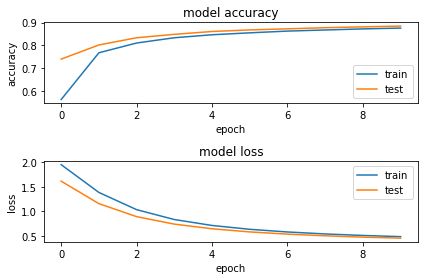

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

## Model Evaluation

In [ ]:
loss_and_metrics = model1.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

1875/1875 - 4s - loss: 0.4756 - accuracy: 0.8781 - 4s/epoch - 2ms/step
Train Loss 0.47558340430259705
Train Accuracy 0.8780666589736938


In [ ]:
loss_and_metrics = model1.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.4557 - accuracy: 0.8851 - 585ms/epoch - 2ms/step
Test Loss 0.4556529223918915
Test Accuracy 0.8851000070571899


## 2. Network with 2 Hidden Layers

In [ ]:
model2= Sequential()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 100)               51300     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 454,230
Trainable params: 454,230
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model2.fit(x_train, y_train, batch_size=128, epochs=10, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model2.evaluate(x_test, y_test, verbose=True)

Epoch 1/10
469/469 [==============================] - 4s 9ms/step - loss: 2.2705 - accuracy: 0.2198 - val_loss: 2.2205 - val_accuracy: 0.3389
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 2.1775 - accuracy: 0.4825 - val_loss: 2.1222 - val_accuracy: 0.5464
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 2.0630 - accuracy: 0.6023 - val_loss: 1.9835 - val_accuracy: 0.6298
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 1.8999 - accuracy: 0.6629 - val_loss: 1.7879 - val_accuracy: 0.7139
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 1.6829 - accuracy: 0.6933 - val_loss: 1.5472 - val_accuracy: 0.7194
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 1.4438 - accuracy: 0.7244 - val_loss: 1.3132 - val_accuracy: 0.7444
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 1.2316 - accuracy: 0.7530 - val_loss: 1.1229 - val_accuracy: 0.7685
Epoch 

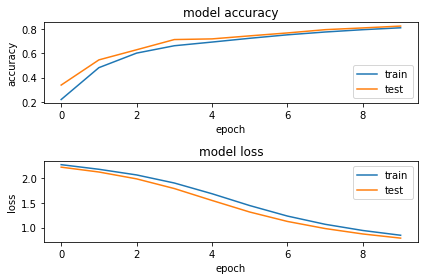

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

## Model Evaluation

In [ ]:
loss_and_metrics = model2.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

1875/1875 - 4s - loss: 0.8033 - accuracy: 0.8215 - 4s/epoch - 2ms/step
Train Loss 0.8032914996147156
Train Accuracy 0.8215166926383972


In [ ]:
loss_and_metrics = model2.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.7858 - accuracy: 0.8250 - 602ms/epoch - 2ms/step
Test Loss 0.7858215570449829
Test Accuracy 0.824999988079071


## 3. Network with 3 Hidden Layers

In [ ]:
model3= Sequential()

In [ ]:
model3.add(Dense(512, input_shape = (784,), activation= 'sigmoid'))
model3.add(Dense(100, activation = 'sigmoid'))
model3.add(Dense(100, activation = 'sigmoid'))
model3.add(Dense(n_classes, activation = 'softmax'))
model3.compile(optimizer="sgd", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 100)               51300     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 464,330
Trainable params: 464,330
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model3.fit(x_train, y_train, batch_size=128, epochs=10, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model3.evaluate(x_test, y_test, verbose=True)

Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 2.3034 - accuracy: 0.1133 - val_loss: 2.2964 - val_accuracy: 0.1142
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 2.2945 - accuracy: 0.1237 - val_loss: 2.2914 - val_accuracy: 0.1269
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 2.2894 - accuracy: 0.1328 - val_loss: 2.2857 - val_accuracy: 0.1319
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 2.2836 - accuracy: 0.1407 - val_loss: 2.2795 - val_accuracy: 0.2075
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 2.2772 - accuracy: 0.1507 - val_loss: 2.2722 - val_accuracy: 0.1551
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 2.2693 - accuracy: 0.1810 - val_loss: 2.2635 - val_accuracy: 0.2257
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 2.2594 - accuracy: 0.2369 - val_loss: 2.2524 - val_accuracy: 0.1982
Epoch 

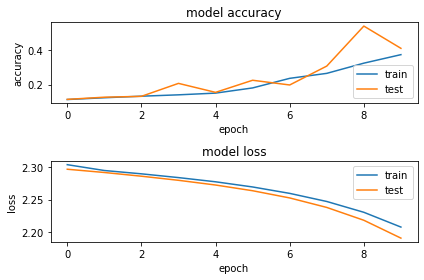

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

## Model Evaluation

In [ ]:
loss_and_metrics = model3.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

1875/1875 - 5s - loss: 2.1932 - accuracy: 0.4087 - 5s/epoch - 2ms/step
Train Loss 2.193237781524658
Train Accuracy 0.40869998931884766


In [ ]:
loss_and_metrics = model3.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 2.1908 - accuracy: 0.4119 - 655ms/epoch - 2ms/step
Test Loss 2.19079852104187
Test Accuracy 0.41190001368522644


## 4. Network with 2 layers and ReLU as an activation func for 1 layer

In [ ]:
model4= Sequential()

In [ ]:
model4.add(Dense(512, input_shape = (784,), activation= 'sigmoid'))
model4.add(Dense(100, activation = 'relu'))
model4.add(Dense(n_classes, activation = 'softmax'))
model4.compile(optimizer="sgd", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dense_10 (Dense)            (None, 100)               51300     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 454,230
Trainable params: 454,230
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model4.fit(x_train, y_train, batch_size=128, epochs=10, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model4.evaluate(x_test, y_test, verbose=True)

Epoch 1/10
469/469 [==============================] - 4s 9ms/step - loss: 1.9429 - accuracy: 0.5363 - val_loss: 1.5245 - val_accuracy: 0.7232
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 1.1894 - accuracy: 0.7651 - val_loss: 0.9022 - val_accuracy: 0.8177
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.7790 - accuracy: 0.8252 - val_loss: 0.6529 - val_accuracy: 0.8452
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.6068 - accuracy: 0.8499 - val_loss: 0.5368 - val_accuracy: 0.8625
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.5193 - accuracy: 0.8658 - val_loss: 0.4705 - val_accuracy: 0.8746
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.4670 - accuracy: 0.8747 - val_loss: 0.4303 - val_accuracy: 0.8843
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.4326 - accuracy: 0.8818 - val_loss: 0.4041 - val_accuracy: 0.8900
Epoch 

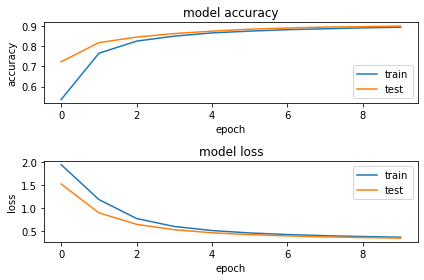

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

##  Model Evaluation

In [ ]:
loss_and_metrics = model4.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

1875/1875 - 5s - loss: 0.3696 - accuracy: 0.8955 - 5s/epoch - 2ms/step
Train Loss 0.36955389380455017
Train Accuracy 0.895466685295105


In [ ]:
loss_and_metrics = model4.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.3552 - accuracy: 0.8996 - 609ms/epoch - 2ms/step
Test Loss 0.35516107082366943
Test Accuracy 0.8996000289916992


## 5. Network with 2 layers and ReLU as an activation func for 1 layer and ADAM optimiser

In [ ]:
model5= Sequential()

In [ ]:
model5.add(Dense(512, input_shape = (784,), activation= 'sigmoid'))
model5.add(Dense(100, activation = 'relu'))
model5.add(Dense(n_classes, activation = 'softmax'))
model5.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 100)               51300     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 454,230
Trainable params: 454,230
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model5.fit(x_train, y_train, batch_size=128, epochs=10, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model5.evaluate(x_test, y_test, verbose=True)

Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 0.4683 - accuracy: 0.8731 - val_loss: 0.2669 - val_accuracy: 0.9204
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2256 - accuracy: 0.9328 - val_loss: 0.1955 - val_accuracy: 0.9406
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1690 - accuracy: 0.9501 - val_loss: 0.1455 - val_accuracy: 0.9571
Epoch 4/10
469/469 [==============================] - 4s 10ms/step - loss: 0.1304 - accuracy: 0.9607 - val_loss: 0.1475 - val_accuracy: 0.9570
Epoch 5/10
469/469 [==============================] - 7s 14ms/step - loss: 0.1034 - accuracy: 0.9686 - val_loss: 0.1099 - val_accuracy: 0.9680
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0818 - accuracy: 0.9748 - val_loss: 0.1001 - val_accuracy: 0.9714
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0674 - accuracy: 0.9797 - val_loss: 0.0842 - val_accuracy: 0.9724
Epo

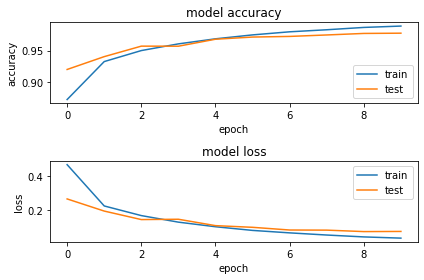

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

##  Model Evaluation

In [ ]:
loss_and_metrics = model5.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

1875/1875 - 5s - loss: 0.0298 - accuracy: 0.9911 - 5s/epoch - 2ms/step
Train Loss 0.029821399599313736
Train Accuracy 0.9910833239555359


In [ ]:
loss_and_metrics = model5.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.0758 - accuracy: 0.9775 - 627ms/epoch - 2ms/step
Test Loss 0.0758250281214714
Test Accuracy 0.9775000214576721


## 6. Network with BatchNormalization

In [ ]:
model6= Sequential()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_16 (Dense)            (None, 100)               51300     
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 456,678
Trainable params: 455,454
Non-tr

In [ ]:
history = model6.fit(x_train, y_train, batch_size=128, epochs=10, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model6.evaluate(x_test, y_test, verbose=True)

Epoch 1/10
469/469 [==============================] - 6s 11ms/step - loss: 0.2231 - accuracy: 0.9355 - val_loss: 0.2002 - val_accuracy: 0.9515
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1120 - accuracy: 0.9683 - val_loss: 0.0975 - val_accuracy: 0.9709
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0807 - accuracy: 0.9763 - val_loss: 0.0857 - val_accuracy: 0.9727
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0643 - accuracy: 0.9809 - val_loss: 0.0877 - val_accuracy: 0.9747
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0491 - accuracy: 0.9854 - val_loss: 0.0852 - val_accuracy: 0.9742
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0419 - accuracy: 0.9874 - val_loss: 0.0762 - val_accuracy: 0.9779
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0358 - accuracy: 0.9894 - val_loss: 0.0745 - val_accuracy: 0.9774

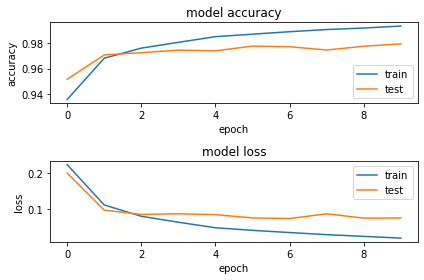

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

## Model Evaluation

In [ ]:
loss_and_metrics = model6.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

1875/1875 - 6s - loss: 0.0124 - accuracy: 0.9966 - 6s/epoch - 3ms/step
Train Loss 0.012367501854896545
Train Accuracy 0.9966333508491516


In [ ]:
loss_and_metrics = model6.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.0760 - accuracy: 0.9797 - 619ms/epoch - 2ms/step
Test Loss 0.0760091245174408
Test Accuracy 0.9797000288963318


## 7. Network with Dropout, L2 regularizer, kernel initializer

In [ ]:
model7= Sequential()

In [ ]:
model7.add(Dropout(0.2,input_shape=(784,)))
model7.add(Dense(512, activation= 'sigmoid',kernel_regularizer=l2(l=0.005),kernel_initializer='uniform'))
model7.add(BatchNormalization())
model7.add(Dropout(rate=0.5))
model7.add(Dense(100, activation = 'relu', kernel_regularizer=l2(l=0.005),kernel_initializer='uniform'))
model7.add(BatchNormalization())
model7.add(Dropout(rate=0.5))
model7.add(Dense(n_classes, activation = 'softmax'))
model7.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 100)               51300     
                                                                 
 batch_normalization_3 (Batc  (None, 100)              400       
 hNormalization)                                      

In [ ]:
history = model7.fit(x_train, y_train, batch_size=128, epochs=10, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model7.evaluate(x_test, y_test, verbose=True)

Epoch 1/10
469/469 [==============================] - 8s 15ms/step - loss: 1.2439 - accuracy: 0.8390 - val_loss: 0.8054 - val_accuracy: 0.8958
Epoch 2/10
469/469 [==============================] - 7s 14ms/step - loss: 0.6714 - accuracy: 0.8767 - val_loss: 0.4589 - val_accuracy: 0.9349
Epoch 3/10
469/469 [==============================] - 6s 14ms/step - loss: 0.6085 - accuracy: 0.8850 - val_loss: 0.4401 - val_accuracy: 0.9353
Epoch 4/10
469/469 [==============================] - 6s 14ms/step - loss: 0.5981 - accuracy: 0.8875 - val_loss: 0.4244 - val_accuracy: 0.9421
Epoch 5/10
469/469 [==============================] - 6s 14ms/step - loss: 0.5977 - accuracy: 0.8895 - val_loss: 0.4222 - val_accuracy: 0.9451
Epoch 6/10
469/469 [==============================] - 6s 14ms/step - loss: 0.6049 - accuracy: 0.8886 - val_loss: 0.4603 - val_accuracy: 0.9325
Epoch 7/10
469/469 [==============================] - 7s 14ms/step - loss: 0.5973 - accuracy: 0.8900 - val_loss: 0.4442 - val_accuracy: 0.9388

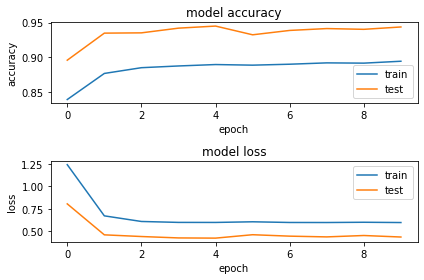

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

##  Model Evaluation

In [ ]:
loss_and_metrics = model7.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

1875/1875 - 5s - loss: 0.4403 - accuracy: 0.9414 - 5s/epoch - 3ms/step
Train Loss 0.440339058637619
Train Accuracy 0.9413833618164062


In [ ]:
loss_and_metrics = model7.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.4346 - accuracy: 0.9438 - 760ms/epoch - 2ms/step
Test Loss 0.4345625936985016
Test Accuracy 0.9437999725341797
